**Churn Analysis**

This project is an end-to-end churn analysis case study project. Let's first define churn analysis: It's the process of studying why customers stopped using a specific product, through identifying patterns, discovering the root causes, predicting future customer turnover, and implementing strategies to improve customer retention.

**What is churn in this business context?**

 We'll be working in the telecom sector. The business presented is a subscription-based telecom / internet service business. Our data consists of customer behaviour, usage patterns, subscription information, and engagement signals. In this context, churn means whether a customer stopped usign the company's services. So if churn vaue was "yes, the customer has left the company. Otherwise, if churn value is "No", the customer is still with the company. So churn here is customer attrition.

 **Why is churn important to measure and reduce?"**

 Such business context is mainy based on monthy subscriptions and in subscription businesses acquiring new customers is expensive.
 Losing existing customers means:

*   Lost recurring revenue
*   Higher marketing costs
*   Lower lifetime value (LTV)

Reducing churn is often more profitable than acquiring new customers.

**Step 1: Data Cleaning and Preparation (Preprocessing)**

**We load the dataset.**

In [2]:
import pandas as pd

telecomdata=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn 2.csv')

**We check the first rows, what columns we have to obtain a general idea of the data we're going to work with.**

In [3]:
telecomdata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**We check if there are any null values, and how much null values available per column. As observed, there are no null values.**

In [4]:
telecomdata.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**In the below cell, we're checking whether or not we have the correct data types available.**

In [5]:
telecomdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**As we saw from the above table, "TotalCharges" is object, we need to convert it to numeric.**

In [6]:
telecomdata["TotalCharges"]=pd.to_numeric(telecomdata["TotalCharges"],errors="coerce")

#coerce converts any a value to NaN instead of throwing errors to values that can't be converted.

In [7]:
telecomdata.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
telecomdata.drop(columns=["customerID"], inplace=True)

**Now that we obtained 11 null values in TotalCharges, we can fill them with 0 since this means that tenure is 0, so the customer still didn't use their service for a complete month at least so the customer shouldn't be charged. Below we're just making sure that for null TotalCharges values, tenure is 0.**

In [9]:
telecomdata[telecomdata["TotalCharges"].isna()][["tenure", "MonthlyCharges", "Contract"]]


,tenure,MonthlyCharges,Contract
488,0,52.55,Two year
753,0,20.25,Two year
936,0,80.85,Two year
1082,0,25.75,Two year
1340,0,56.05,Two year
3331,0,19.85,Two year
3826,0,25.35,Two year
4380,0,20.00,Two year
5218,0,19.70,One year
6670,0,73.35,Two year


**Step 2: Exploratory Data Analysis**

**We're trying to analyze the number of people who churned and who didn't.**

In [10]:
telecomdata["Churn"].value_counts(normalize=True)*100

,proportion
Churn,
No,73.463013
Yes,26.536987


**As we saw below, we're providing an exploratory analysis for the table we have. The No churn row represents the number of customers who are still using the company's services, and yes means the customers left the company. for example, mean represents the average tenure. min and max represent the minimum and maximum time the customer stayed. Customers who did not churn have a median tenure of 38 months, while churned customers have a much lower median tenure of 10 months. Approximately 25% of churned customers leave within the first 2 months, indicating that churn is predominantly an early-stage issue. In contrast, long-tenure customers are significantly less likely to churn.**

In [11]:
telecomdata.groupby("Churn")["tenure"].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


**Do longer contracts reduce churn?. This is the objective of the below table. As we observe, the answer is yes, longer contracts significantly reduce churn. Churn rates vary significantly by contract type. Customers on month-to-month contracts exhibit the highest churn, while one-year and two-year contracts show substantially lower churn rates. This suggests that longer contractual commitments are strongly associated with customer retention.**

In [12]:
pd.crosstab(telecomdata["Contract"], telecomdata["Churn"], normalize="index") * 100

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


**Do support/security services reduce churn?. Let's answer these questions by providing the below tables.**

**Churn analysis indicates that customers with internet service but without OnlineSecurity experience significantly higher churn rates compared to customers who subscribe to security services. In contrast, customers without internet service exhibit the lowest churn rates. This suggests that security-related services play a critical role in improving customer retention and represent an effective lever for churn reduction.**

In [13]:
pd.crosstab(telecomdata["OnlineSecurity"], telecomdata["Churn"], normalize="index") * 100

Churn,No,Yes
OnlineSecurity,,
No,58.233276,41.766724
No internet service,92.595020,7.404980
Yes,85.388806,14.611194


**Customers without TechSupport exhibit significantly higher churn rates (≈41.6%) compared to customers who subscribe to TechSupport (≈15.2%). Similar to OnlineSecurity, customers without internet service show the lowest churn rates (≈7.4%). This indicates that technical support services are strongly associated with improved customer retention and can serve as an effective churn mitigation strategy.**

In [14]:
pd.crosstab(telecomdata["TechSupport"], telecomdata["Churn"], normalize="index") * 100

Churn,No,Yes
TechSupport,,
No,58.364526,41.635474
No internet service,92.595020,7.404980
Yes,84.833659,15.166341


<Figure size 600x400 with 0 Axes>

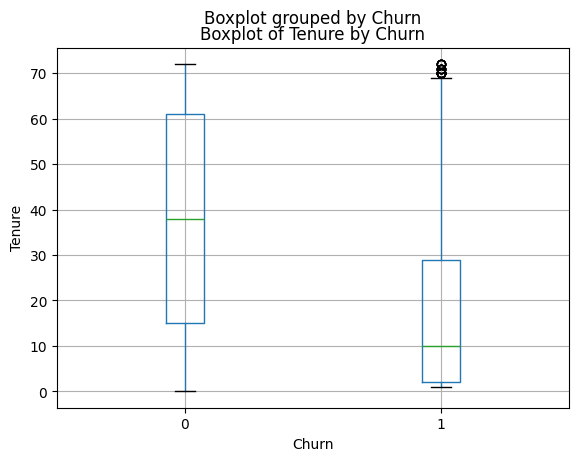

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
telecomdata.boxplot(column="tenure", by="Churn")
plt.title("Boxplot of Tenure by Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure")
plt.show()


**Customers who churn tend to have significantly lower tenure compared to customers who stay, indicating that newer customers are at higher risk of leaving.**


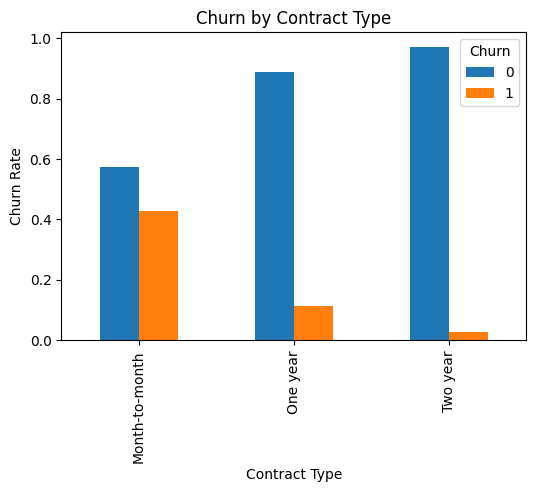

In [73]:
import matplotlib.pyplot as plt

# We'll create a temporary 'Contract_Type_for_plot' column from one-hot encoded 'Contract' columns in telecomdata
# Assume 'Month-to-month' is the default if 'Contract_One year' and 'Contract_Two year' are not present/active.
# We need to use the original telecomdata before it was one-hot encoded for features like Contract
# However, the current telecomdata in the kernel state *is* already one-hot encoded.
# So, we will use the one-hot encoded columns to infer the contract type.

# we check if original 'Contract' column exists. If not, infer from one-hot encoded columns.
# Since the error indicates 'Contract' is missing, we assume one-hot encoding has happened.

# Create a copy to avoid modifying the original telecomdata DataFrame directly
temp_telecomdata_for_plot = telecomdata.copy()

# Assuming the one-hot encoded columns are named 'Contract_One year' and 'Contract_Two year'
# If telecomdata has 'Churn' as 0/1 already, we use it directly.

# Then we reconstruct 'Contract Type' for plotting purposes
temp_telecomdata_for_plot['Contract_Type_for_plot'] = 'Month-to-month'
if 'Contract_One year' in temp_telecomdata_for_plot.columns:
    temp_telecomdata_for_plot.loc[temp_telecomdata_for_plot['Contract_One year'] == 1, 'Contract_Type_for_plot'] = 'One year'
if 'Contract_Two year' in temp_telecomdata_for_plot.columns:
    temp_telecomdata_for_plot.loc[temp_telecomdata_for_plot['Contract_Two year'] == 1, 'Contract_Type_for_plot'] = 'Two year'

# Now we use the reconstructed 'Contract_Type_for_plot' and the numerical 'Churn' column
churn_crosstab = pd.crosstab(
    temp_telecomdata_for_plot["Contract_Type_for_plot"],
    temp_telecomdata_for_plot["Churn"],
    normalize="index"
)

churn_crosstab.plot(kind="bar", figsize=(6,4))
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate")
plt.show()

**Customers on month-to-month contracts exhibit a much higher churn rate compared to those on one- or two-year contracts, suggesting that long-term contracts reduce churn risk.**

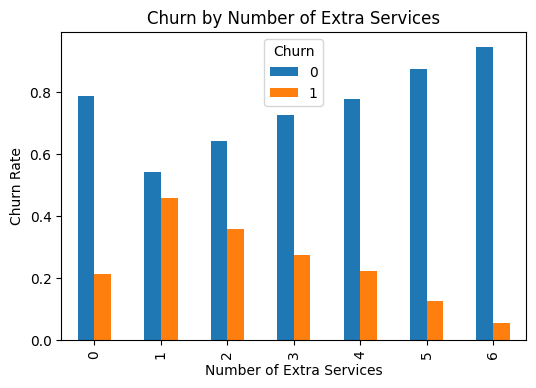

In [75]:
pd.crosstab(telecomdata["services_count"], telecomdata["Churn"], normalize="index").plot(kind="bar", figsize=(6,4))
plt.title("Churn by Number of Extra Services")
plt.xlabel("Number of Extra Services")
plt.ylabel("Churn Rate")
plt.show()

**Customers subscribed to fewer services are more likely to churn, indicating that deeper product engagement reduces churn probability.**

**Step 3: Feature Engineering**

**Customers were grouped into tenure categories (New, Mid, Old) to capture early-stage churn behavior and simplify interpretation. So basically we converted the columns are now meaningful categories.**

In [15]:
def tenure_group(tenure):
  if tenure<12:
    return "New"
  elif tenure<36:
    return "Mid"
  else:
    return "Old"

telecomdata["tenure_group"]=telecomdata["tenure"].apply(tenure_group)

**How many extra services did this customer buy? The answer is obtained from the below new column "service count".**

In [16]:
service_cols=["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
telecomdata["services_count"]=telecomdata[service_cols].apply(lambda x: (x=="Yes").sum(), axis=1)

In [17]:
telecomdata["services_count"].head()

,services_count
0,1
1,2
2,2
3,3
4,0


**Step 4: Training the models**

**In machine learning, we start with two main components: X, which represents the independent variables (features such as tenure, monthly charges, services, etc.), and y, which represents the dependent variable (the target we want to predict, in this case customer churn). To properly evaluate a model, the dataset is split into training and testing parts. This split produces four variables. x_train contains the independent variables used to train the model, while y_train contains the correct churn labels corresponding to x_train, allowing the model to learn the relationship between inputs and outputs. x_test contains independent variables that the model has never seen before, and y_test contains the true churn labels for x_test. By comparing the model’s predictions on x_test with the actual values in y_test, we can objectively evaluate how well the model generalizes to new, unseen data.**

In [50]:
from sklearn.model_selection import train_test_split

X=telecomdata.drop(columns=["Churn"], axis=1)
y=telecomdata["Churn"]


x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
x_train=x_train.fillna(x_train.median())
x_test=x_test.fillna(x_test.median())


In [51]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(random_state=42)
model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred=model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) #in confusion matrix, we have firs trow TN then FP, second row we have FN TP

[[928 107]
 [170 204]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [53]:
from sklearn.linear_model import LogisticRegression
model_bal=LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")
model_bal.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred=model_bal.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[742 293]
 [ 77 297]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [55]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, class_weight="balanced")
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [56]:
y_pred_rf=rf.predict(x_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[932 103]
 [191 183]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [57]:
# get churn probabilities (class 1)
y_prob_rf = rf.predict_proba(x_test)[:, 1]

# use lower threshold
y_pred_rf_03 = (y_prob_rf >= 0.3).astype(int)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred_rf_03))
print(classification_report(y_test, y_pred_rf_03))

[[787 248]
 [ 99 275]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1035
           1       0.53      0.74      0.61       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.75      0.76      1409



**Postdictive Analysis**

**The final Random Forest model with a tuned decision threshold achieved a recall of approximately 74% for churned customers, meaning that most churners were successfully identified. However, the model still misclassified some customers.

False negatives (missed churners) likely correspond to customers with medium tenure and moderate service usage, whose behavior overlaps with loyal customers. False positives represent customers flagged as high risk who ultimately did not churn; while this increases intervention cost, it is generally acceptable in churn management scenarios where retaining customers is more valuable than the cost of outreach.

Overall, the model performs well in prioritizing high-risk customers but struggles with borderline cases where customer behavior is ambiguous.**

In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

results = pd.DataFrame({
    "Model": ["LogReg (balanced)", "Random Forest"],
    "Precision": [
        precision_score(y_test, model_bal.predict(x_test)),
        precision_score(y_test, y_pred_rf_03)
    ],
    "Recall": [
        recall_score(y_test, model_bal.predict(x_test)),
        recall_score(y_test, y_pred_rf_03)
    ],
    "F1": [
        f1_score(y_test, model_bal.predict(x_test)),
        f1_score(y_test, y_pred_rf_03)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, model_bal.predict_proba(x_test)[:,1]),
        roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])
    ]
})

results

,Model,Precision,Recall,F1,ROC-AUC
0,LogReg (balanced),0.503390,0.794118,0.616183,0.843080
1,Random Forest,0.525813,0.735294,0.613155,0.826587


**Model Comparison Summary

Both models perform well in predicting customer churn, but they exhibit different trade-offs.
The Logistic Regression (balanced) model achieves the highest recall (0.79) and higher ROC-AUC (0.84), meaning it is better at identifying customers who are likely to churn and has stronger overall discriminatory power. This makes it suitable when the business priority is to minimize missed churners, even at the cost of more false positives.

The Random Forest model provides slightly higher precision (0.53) but lower recall (0.74) and ROC-AUC (0.83). This indicates a more conservative model that reduces false alarms but misses more actual churners.

Overall, Logistic Regression with class weighting is the preferred model for churn management scenarios where retaining at-risk customers is more important than avoiding unnecessary interventions.**

**Note that precision and recall are important metrics that show the accuracy of the model's positive predictions and its ability to find relevant items .. respectively.**

**For churn prediction, recall and ROC-AUC matter more than accuracy; therefore, the balanced Logistic Regression model is the most suitable choice for this problem.**